## Problem 1:

**You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.**

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
import seaborn as sns; sns.set() # for plot styling
from scipy import stats
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import math
import warnings
warnings.filterwarnings('ignore')

## 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [243]:
election=pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes",index_col=0)

In [244]:
election.head(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male
6,Labour,47,3,4,4,4,4,2,male
7,Labour,57,2,2,4,4,11,2,male
8,Labour,77,3,4,4,1,1,0,male
9,Labour,39,3,3,4,4,11,0,female
10,Labour,70,3,2,5,1,11,2,male


In [245]:
election.shape

(1525, 9)

In [246]:
election.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [247]:
election.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [248]:
election.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [249]:
election["gender"].value_counts()

female    812
male      713
Name: gender, dtype: int64

In [250]:
election["vote"].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [251]:
dups = election.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
election[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
68,Labour,35,4,4,5,2,3,2,male
627,Labour,39,3,4,4,2,5,2,male
871,Labour,38,2,4,2,2,4,3,male
984,Conservative,74,4,3,2,4,8,2,female
1155,Conservative,53,3,4,2,2,6,0,female
1237,Labour,36,3,3,2,2,6,2,female
1245,Labour,29,4,4,4,2,2,2,female
1439,Labour,40,4,3,4,2,2,2,male


In [252]:
data = election[election.duplicated()]
data.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
68,Labour,35,4,4,5,2,3,2,male
627,Labour,39,3,4,4,2,5,2,male
871,Labour,38,2,4,2,2,4,3,male
984,Conservative,74,4,3,2,4,8,2,female
1155,Conservative,53,3,4,2,2,6,0,female


In [253]:
election.skew()

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

## Q2)Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

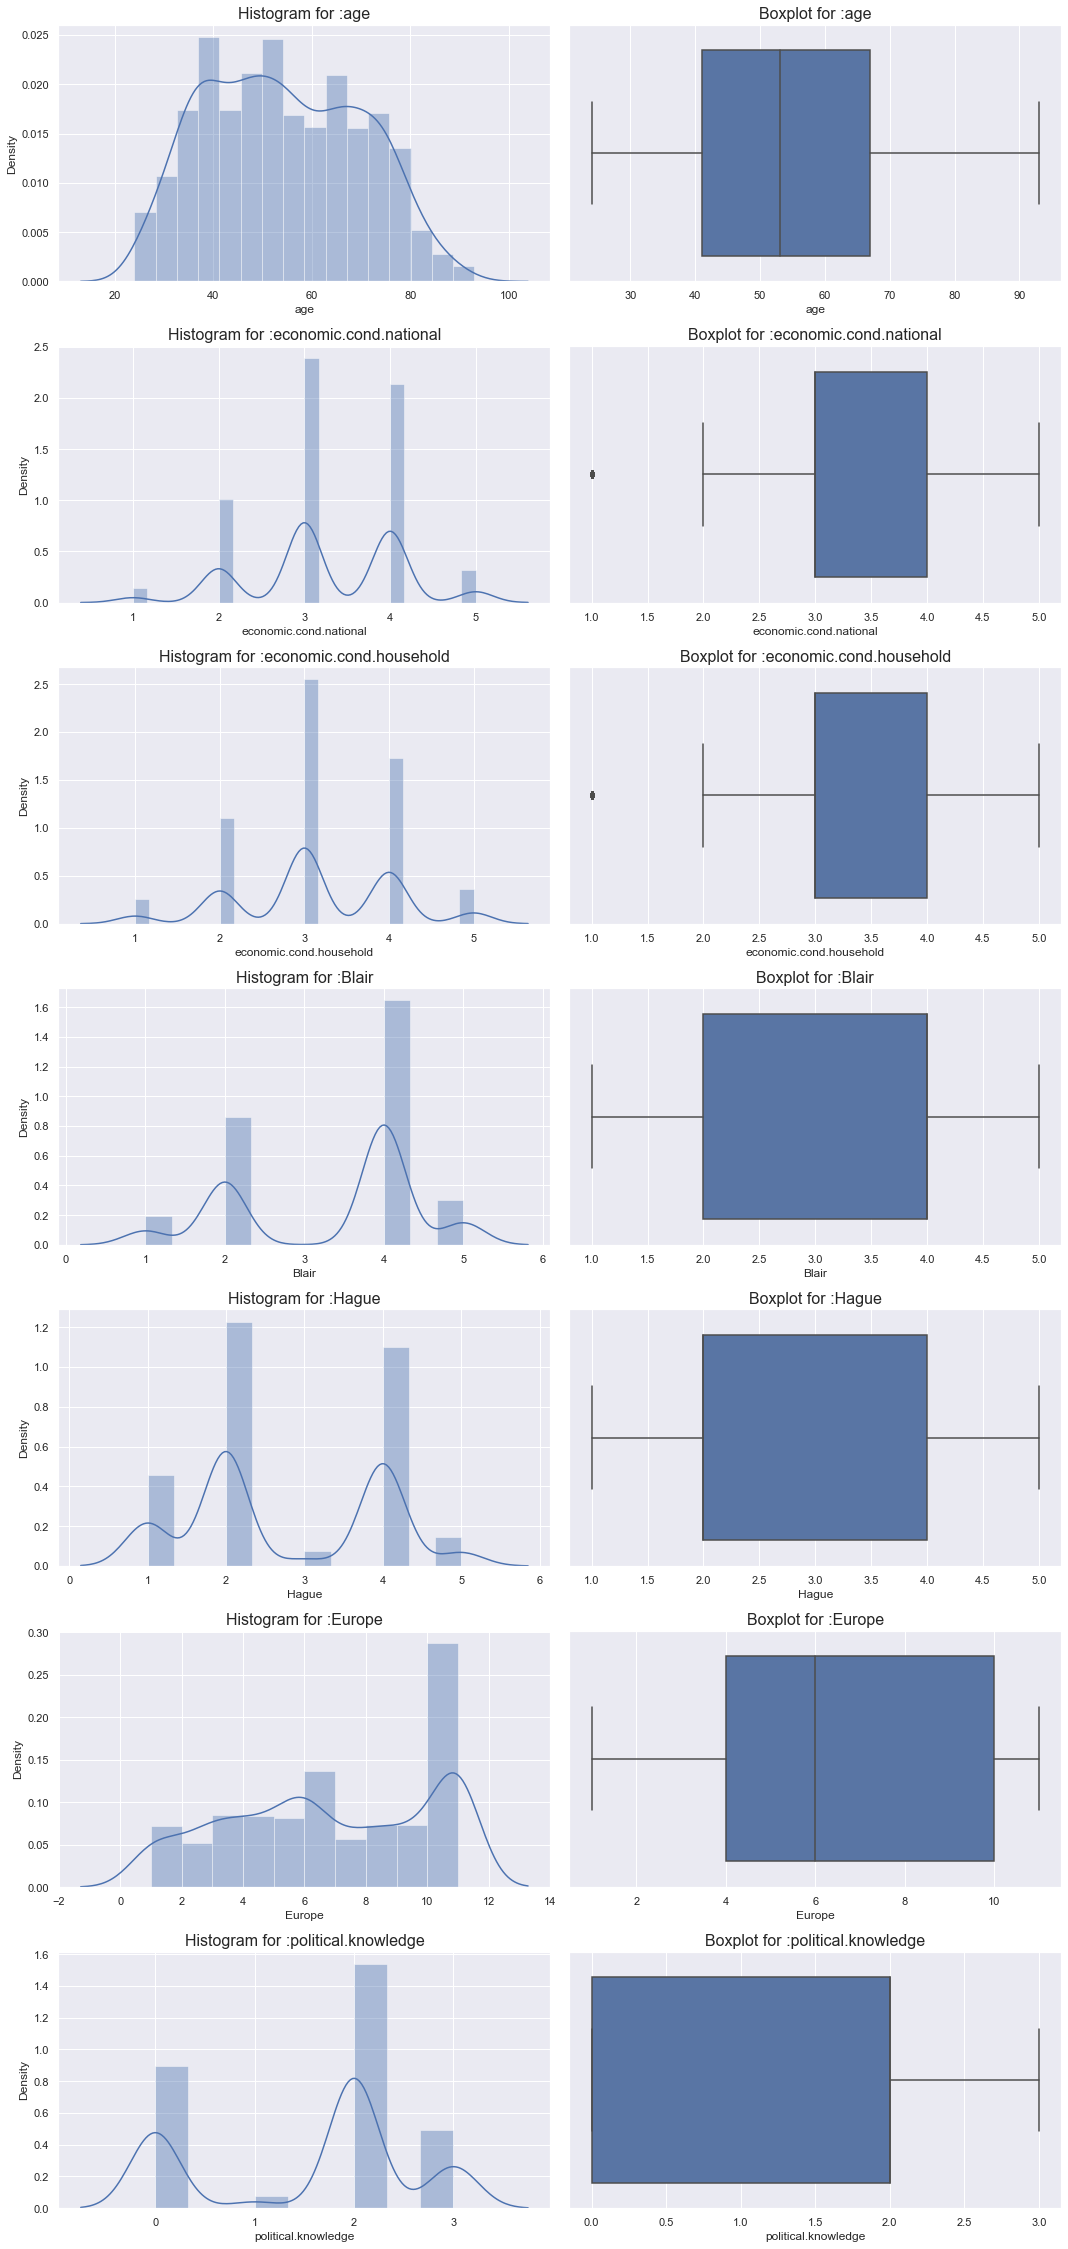

In [254]:
a=1
plt.figure(figsize=(15,80))
for i in election.columns :
    if election[i].dtypes != 'object':
        plt.subplot(18,2,a)
        sns.distplot(election[i])
        plt.title("Histogram for :" +i,fontsize = 16)
        plt.subplot(18,2,a+1)
        sns.boxplot(election[i])
        plt.title("Boxplot for :" +i,fontsize = 16)
        a+=2
plt.tight_layout()

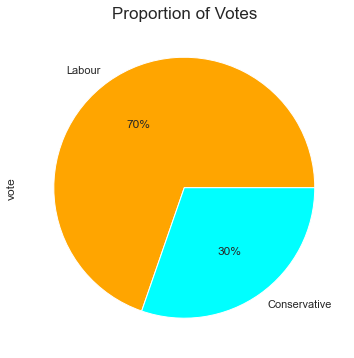

In [255]:
plt.figure(figsize=(6,6))
colors = ['orange','cyan']
election.vote.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Votes',fontsize=17);

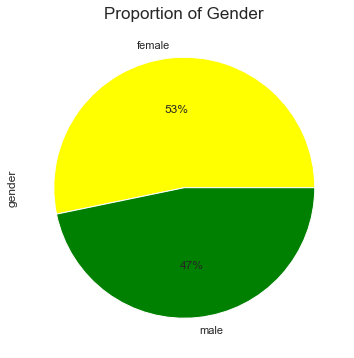

In [256]:
plt.figure(figsize=(6,6))
colors = ['yellow','green']
election.gender.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Gender',fontsize=17);

<Figure size 864x576 with 0 Axes>

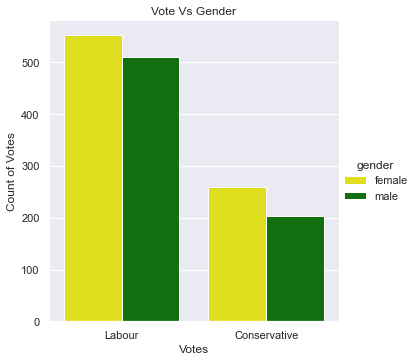

In [257]:
plt.figure(figsize=(12,8))
ax = sns.catplot(x="vote", hue="gender", kind="count", data=election, palette = colors)
plt.title('Vote Vs Gender')
plt.xlabel('Votes')
plt.ylabel('Count of Votes');

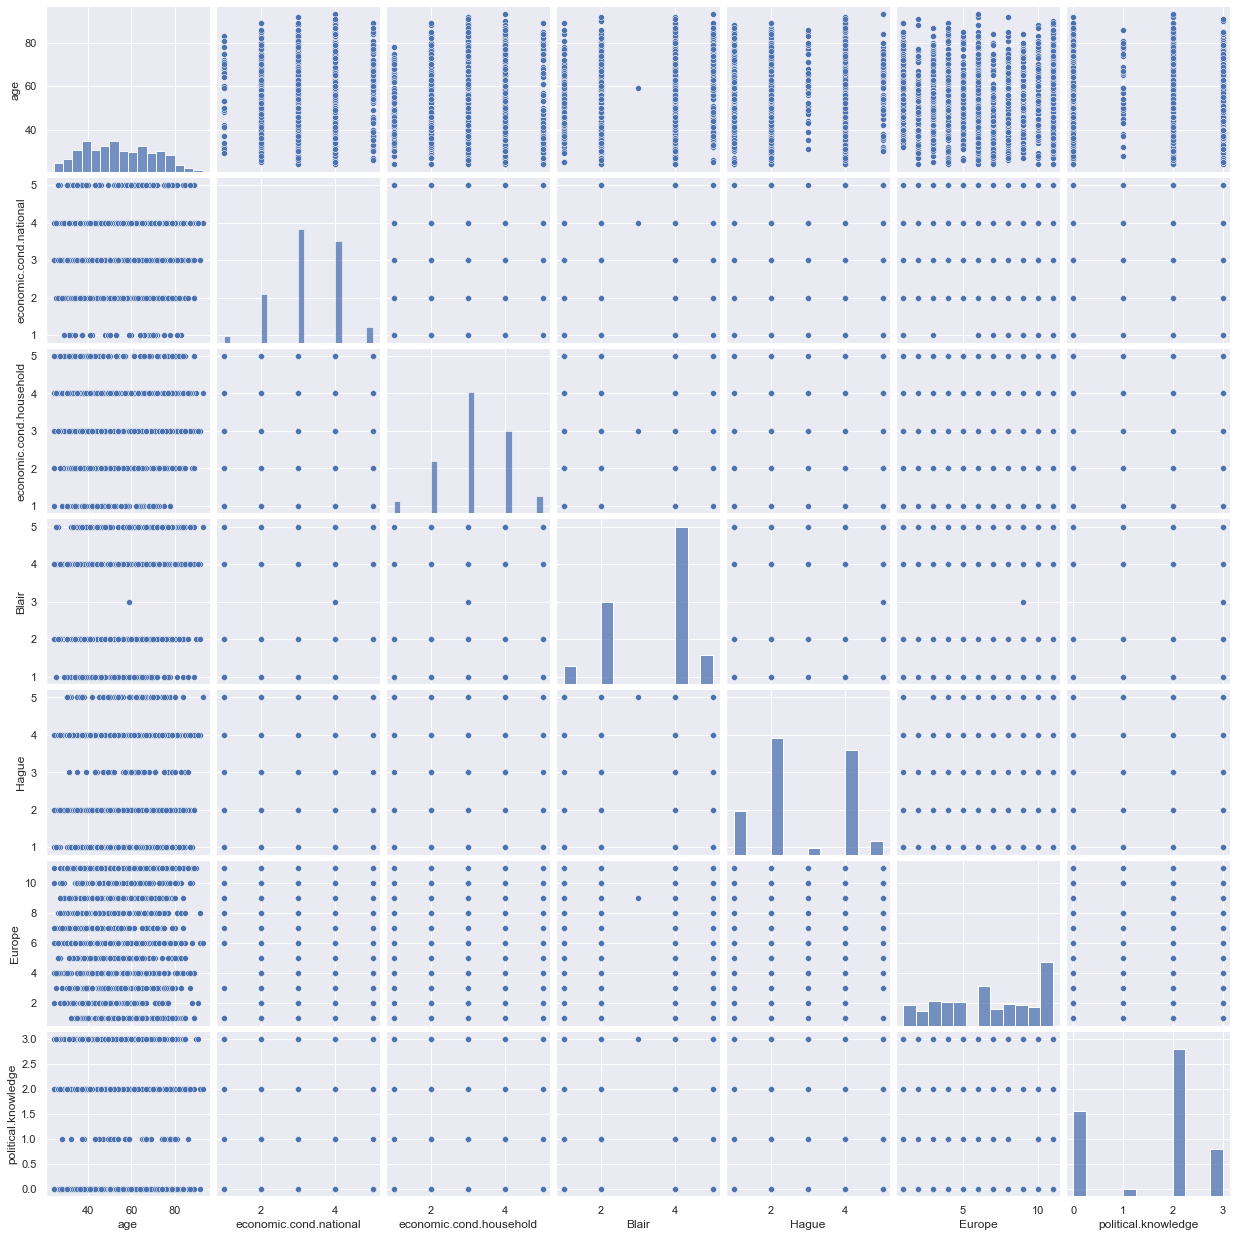

In [258]:
sns.pairplot(election)

<AxesSubplot:xlabel='Hague', ylabel='age'>

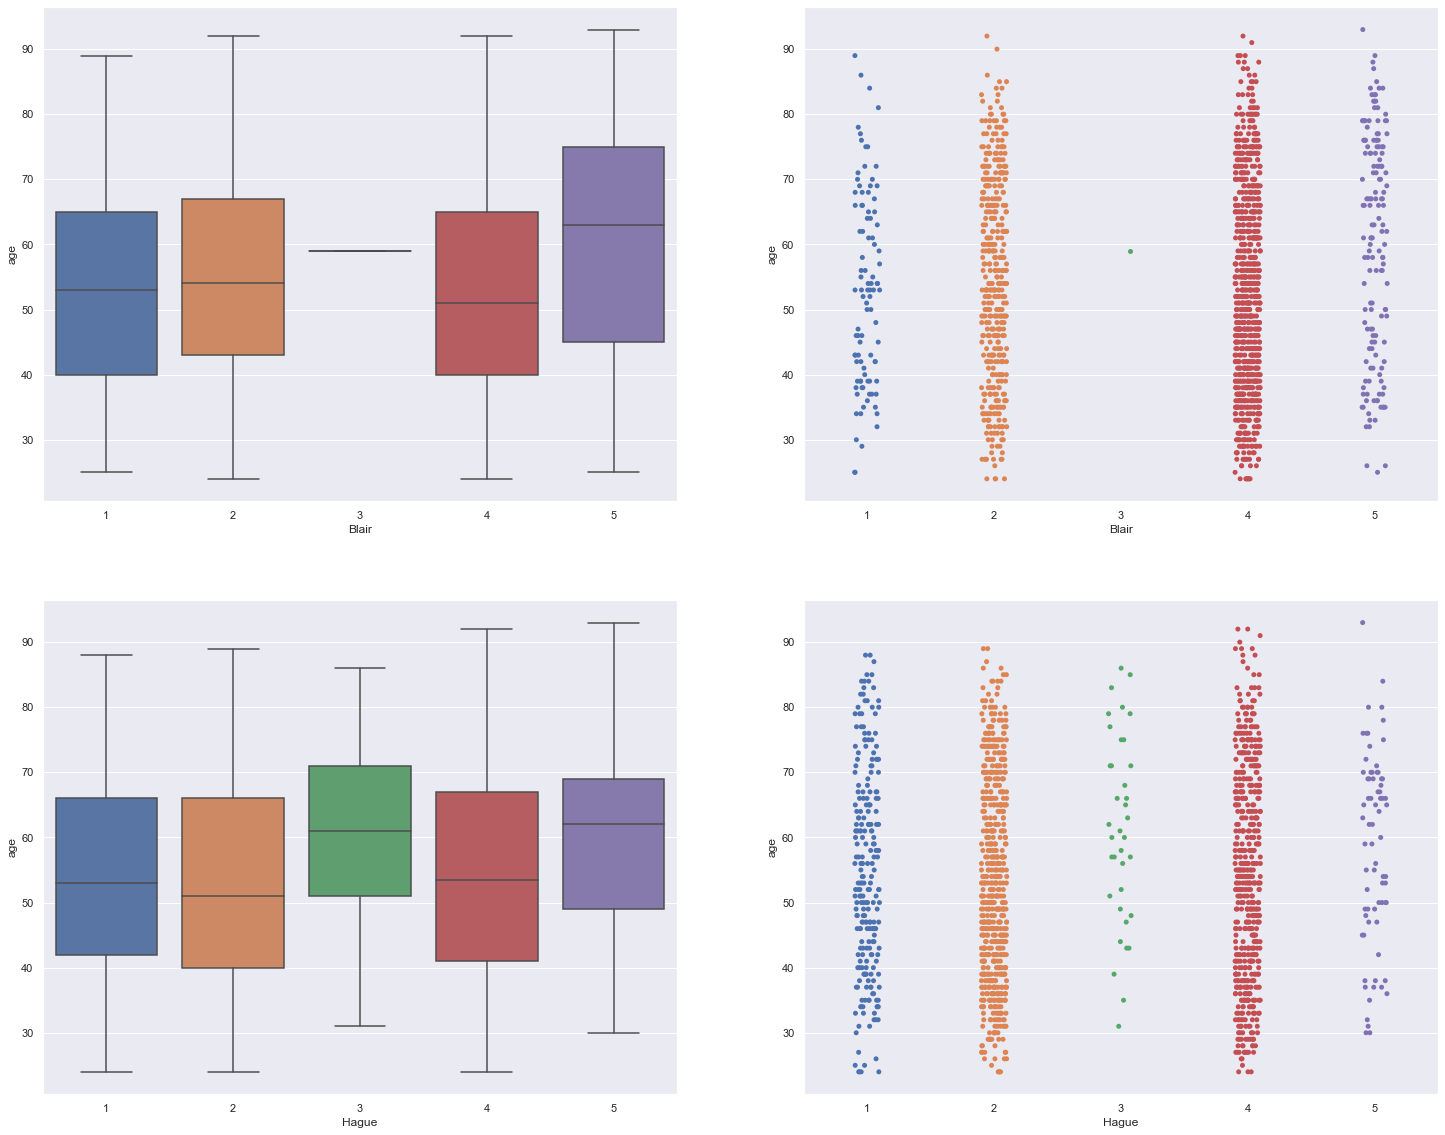

In [259]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(25,20)
sns.boxplot(election["Blair"],election["age"], ax = axes[0][0])
sns.stripplot(election["Blair"],election["age"], ax = axes[0][1])
sns.boxplot(election["Hague"],election["age"], ax = axes[1][0])
sns.stripplot(election["Hague"],election["age"], ax = axes[1][1])

<AxesSubplot:xlabel='Blair', ylabel='Count'>

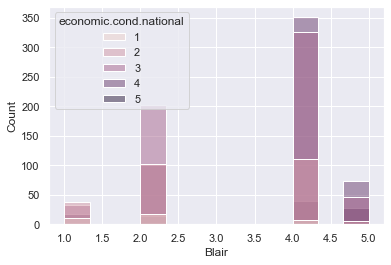

In [260]:
sns.histplot(data =election , x = "Blair", hue = "economic.cond.national")

<AxesSubplot:xlabel='Blair', ylabel='Count'>

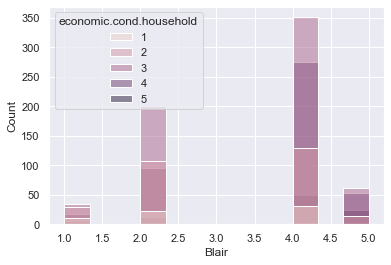

In [261]:
sns.histplot(data =election , x = "Blair", hue = "economic.cond.household")

<AxesSubplot:xlabel='Hague', ylabel='Count'>

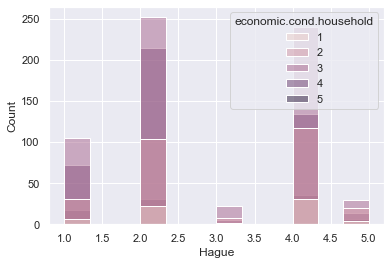

In [262]:
sns.histplot(data =election , x = "Hague", hue = "economic.cond.household")

<AxesSubplot:xlabel='Hague', ylabel='Count'>

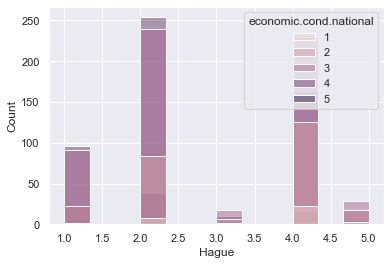

In [263]:
sns.histplot(data =election , x = "Hague", hue = "economic.cond.national")

<AxesSubplot:xlabel='Blair', ylabel='Count'>

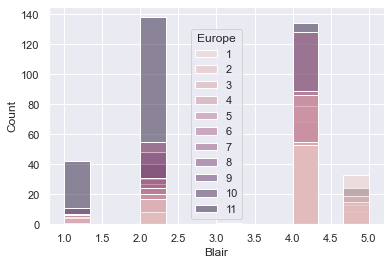

In [264]:
sns.histplot(data =election , x = "Blair", hue = "Europe")

<AxesSubplot:xlabel='Hague', ylabel='Count'>

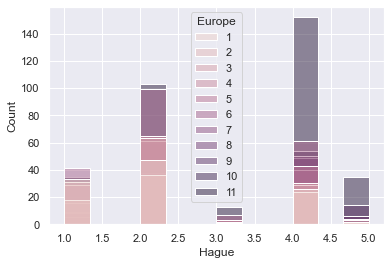

In [265]:
sns.histplot(data =election , x = "Hague", hue = "Europe")

<AxesSubplot:xlabel='Hague', ylabel='Count'>

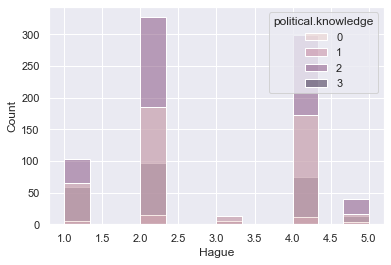

In [266]:
sns.histplot(data =election , x = "Hague", hue = "political.knowledge")

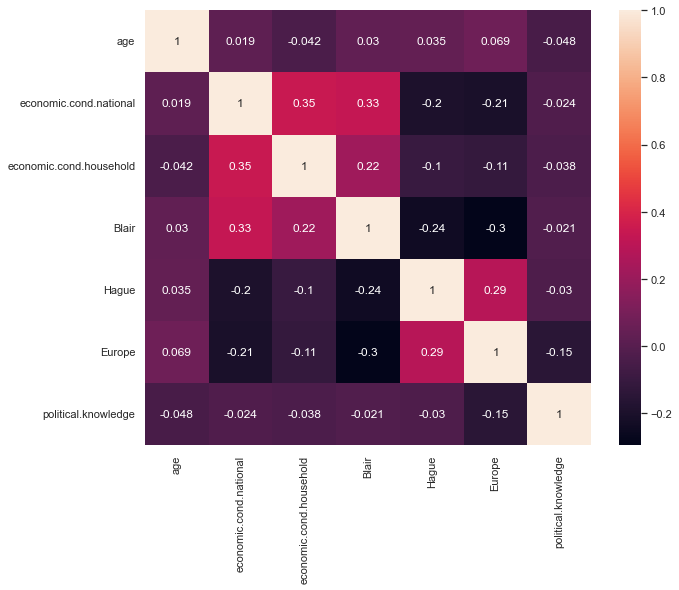

In [267]:
plt.figure(figsize=(10,8))
sns.heatmap(election.corr(),annot=True)
plt.show()

## 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test

In [268]:
#### get_dummies of the object variables
election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


In [269]:
cat=[]
num=[]
for i in election.columns:
    if election[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [270]:
print(cat)

['vote', 'gender']


**Drop First is used to ensure that multiple columns created based on the levels of categorical variable are not included else it will result in to multicollinearity . This is done to ensure that we do not land in to dummy trap.**

In [271]:
election =pd.get_dummies(election, columns=cat,drop_first=True)

In [272]:
election.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
1,43,3,3,4,1,2,2,1,0
2,36,4,4,4,4,5,2,1,1
3,35,4,4,5,2,3,2,1,1
4,24,4,2,2,1,4,0,1,0
5,41,2,2,1,1,6,2,1,1


In [273]:
# scaling the variables
print(num)

['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [274]:
election[num] = election[num].apply(lambda x:(x-x.min()) / (x.max()-x.min()))  # min max scaling 

In [275]:
# Check if the variables have been scaled or not
election.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
1,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,1,0
2,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1,1
3,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1,1
4,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,1,0
5,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1,1


In [276]:
# transform data
from sklearn.model_selection import train_test_split

In [277]:
x = election.drop("vote_Labour",axis = 1)
y = election.pop("vote_Labour")

In [278]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(x, y, test_size=0.30,random_state=1)

## 1.4 Apply Logistic Regression and LDA (linear discriminant analysis)

In [279]:
from sklearn.linear_model import LogisticRegression

In [280]:
# Fit the Logistic Regression model
lr = LogisticRegression(tol=0.0001,max_iter=2000,random_state= 1)

In [281]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=2000, random_state=1)

In [282]:
y_train_predict=lr.predict(X_train)

In [283]:
from sklearn.metrics import classification_report,confusion_matrix

In [284]:
print(classification_report(y_train ,y_train_predict))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       332
           1       0.86      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.83      0.84      0.83      1067



AxesSubplot(0.125,0.125;0.62x0.755)


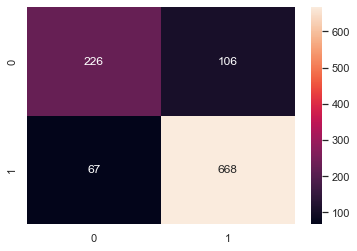

In [285]:
print(sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True , fmt="2g"))

In [286]:
print(confusion_matrix(y_test,lr.predict(X_test)))
print(classification_report(y_test,lr.predict(X_test)))

[[ 84  46]
 [ 36 292]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.86      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



In [287]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train_predict, y_train))

0.16213683223992503


In [288]:
print(mean_squared_error(lr.predict(X_test), y_test))

0.17903930131004367


In [289]:
from sklearn.metrics import roc_auc_score,roc_curve

AUC: 0.890


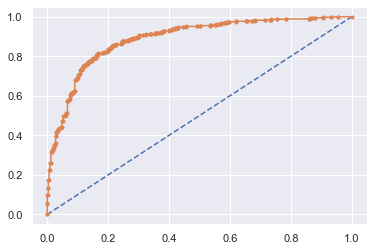

In [290]:
# AUC and ROC for the training data

# predict probabilities
probs = lr.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.883


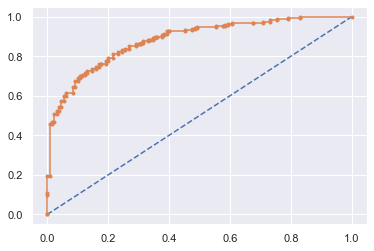

In [291]:
# AUC and ROC for the test data

# predict probabilities
probs = lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [292]:
# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA_model = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [293]:
LDA_model = LDA_model.fit(X_train,y_train)

In [294]:
print(confusion_matrix(LDA_model.predict(X_train),y_train))
print(classification_report(LDA_model.predict(X_train),y_train))

[[233  75]
 [ 99 660]]
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       308
           1       0.90      0.87      0.88       759

    accuracy                           0.84      1067
   macro avg       0.80      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [295]:
print(confusion_matrix(LDA_model.predict(X_test),y_test))
print(classification_report(LDA_model.predict(X_test),y_test))

[[ 86  39]
 [ 44 289]]
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       125
           1       0.88      0.87      0.87       333

    accuracy                           0.82       458
   macro avg       0.77      0.78      0.77       458
weighted avg       0.82      0.82      0.82       458



AUC: 0.889


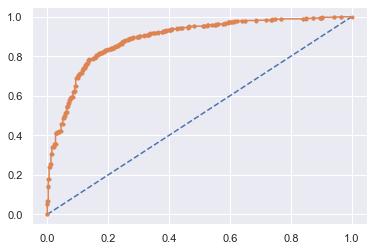

In [296]:
# AUC and ROC for the training data

# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

AUC: 0.884


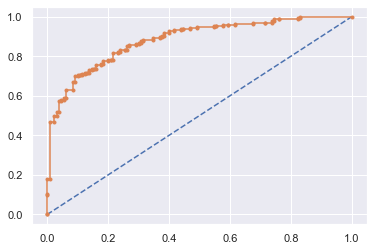

In [297]:
# AUC and ROC for the test data

# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

In [298]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [299]:
knn = knn.fit(X_train,y_train)

In [300]:
pred_label= knn.predict(X_test)
knn.score(X_test,y_test)

0.8231441048034934

In [301]:
print(confusion_matrix(knn.predict(X_train),y_train))

[[251  63]
 [ 81 672]]


In [303]:
## Performance Matrix on train data set
y_train_predict = knn.predict(X_train)
model_score = knn.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8650421743205249
[[251  81]
 [ 63 672]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       332
           1       0.89      0.91      0.90       735

    accuracy                           0.87      1067
   macro avg       0.85      0.84      0.84      1067
weighted avg       0.86      0.87      0.86      1067



In [304]:
## Performance Matrix on test data set
y_test_predict = knn.predict(X_test)
model_score = knn.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8231441048034934
[[ 95  35]
 [ 46 282]]
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       130
           1       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.80      0.79       458
weighted avg       0.83      0.82      0.83       458



AUC: 0.935


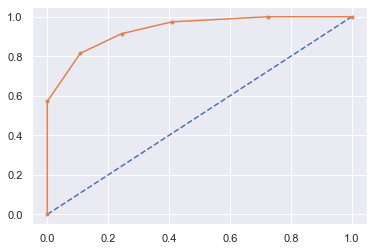

In [305]:
# AUC and ROC for the training data

# predict probabilities
probs = knn.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

AUC: 0.864


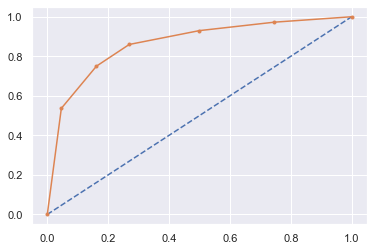

In [311]:
# AUC and ROC for the test data

# predict probabilities
probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [312]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

In [313]:
nb=GaussianNB()

In [314]:
nb= nb.fit(X_train, y_train)

In [315]:
print(confusion_matrix(nb.predict(X_train),y_train))
print(classification_report(nb.predict(X_train),y_train))

[[240  86]
 [ 92 649]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       326
           1       0.88      0.88      0.88       741

    accuracy                           0.83      1067
   macro avg       0.80      0.81      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [316]:
print(confusion_matrix(nb.predict(X_test),y_test))
print(classification_report(nb.predict(X_test),y_test))

[[ 94  44]
 [ 36 284]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       138
           1       0.87      0.89      0.88       320

    accuracy                           0.83       458
   macro avg       0.79      0.78      0.79       458
weighted avg       0.82      0.83      0.82       458



AUC: 0.886


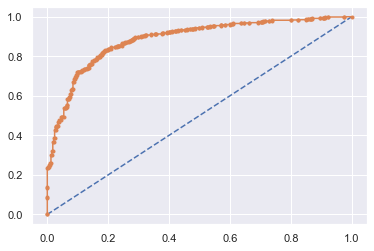

In [317]:
# AUC and ROC for the training data

# predict probabilities
probs = nb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

AUC: 0.885


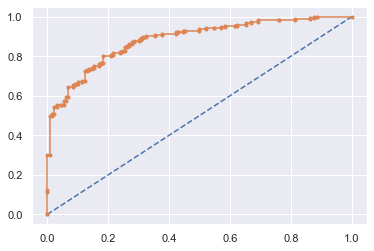

In [318]:
## AUC and ROC for the test data

# predict probabilities
probs = nb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

**So we will select models which have performed approximately similar on the train and test data set and apply smote on the same to check if the performance has improved or not i.e. Naive Bayes and KNN**

## 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

In [319]:
!pip install imbalanced-learn

In [320]:
from imblearn.over_sampling import SMOTE

In [321]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [322]:
## Let's check the shape after SMOTE
X_train_res.shape

(1470, 8)

In [323]:
## Naive Bayes with SMOTE

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [324]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [325]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.8217687074829932
[[596 139]
 [123 612]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       735
           1       0.81      0.83      0.82       735

    accuracy                           0.82      1470
   macro avg       0.82      0.82      0.82      1470
weighted avg       0.82      0.82      0.82      1470



In [326]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7882096069868996
[[103  27]
 [ 70 258]]
              precision    recall  f1-score   support

           0       0.60      0.79      0.68       130
           1       0.91      0.79      0.84       328

    accuracy                           0.79       458
   macro avg       0.75      0.79      0.76       458
weighted avg       0.82      0.79      0.80       458



In [327]:
## KNN With SMOTE

from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [328]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.889795918367347
[[690  45]
 [117 618]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.89       735
           1       0.93      0.84      0.88       735

    accuracy                           0.89      1470
   macro avg       0.89      0.89      0.89      1470
weighted avg       0.89      0.89      0.89      1470



In [329]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7663755458515283
[[106  24]
 [ 83 245]]
              precision    recall  f1-score   support

           0       0.56      0.82      0.66       130
           1       0.91      0.75      0.82       328

    accuracy                           0.77       458
   macro avg       0.74      0.78      0.74       458
weighted avg       0.81      0.77      0.78       458



In [330]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=500,random_state=1).fit(X_train, y_train)

In [331]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [332]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8253275109170306
[[ 90  40]
 [ 40 288]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       130
           1       0.88      0.88      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



AUC: 1.000


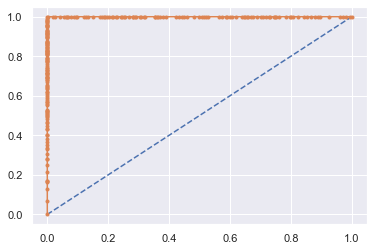

In [333]:
# AUC and ROC for the training data

# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

AUC: 0.891


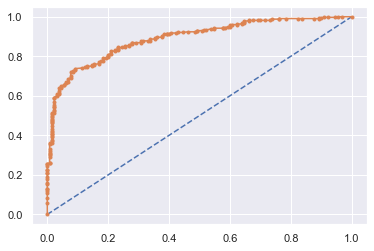

In [334]:
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [335]:
## Bagging

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
cart = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [336]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score = Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9653233364573571
[[304  28]
 [  9 726]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       332
           1       0.96      0.99      0.98       735

    accuracy                           0.97      1067
   macro avg       0.97      0.95      0.96      1067
weighted avg       0.97      0.97      0.97      1067



In [337]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8384279475982532
[[ 93  37]
 [ 37 291]]
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       130
           1       0.89      0.89      0.89       328

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458



In [338]:
# Ada Boost
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1).fit(X_train, y_train)


In [339]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8472352389878163
[[238  94]
 [ 69 666]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



In [340]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8187772925764192
[[ 90  40]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



AUC: 0.913


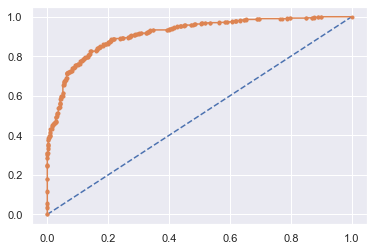

In [341]:
# AUC and ROC for the training data

# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

AUC: 0.879


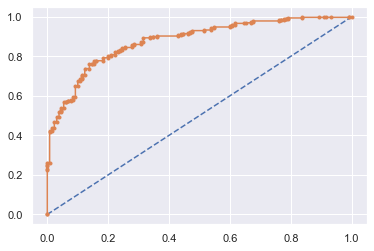

In [342]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [343]:
# Decision Tree
from sklearn import tree
DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [344]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[332   0]
 [  1 734]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [345]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7554585152838428
[[ 81  49]
 [ 63 265]]
              precision    recall  f1-score   support

           0       0.56      0.62      0.59       130
           1       0.84      0.81      0.83       328

    accuracy                           0.76       458
   macro avg       0.70      0.72      0.71       458
weighted avg       0.76      0.76      0.76       458



AUC: 1.000


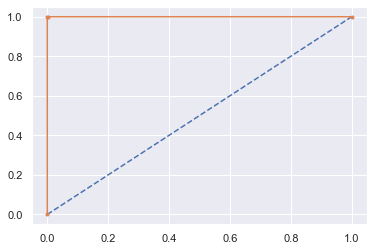

In [346]:
# AUC and ROC for the training data

# predict probabilities
probs = DT_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

AUC: 0.716


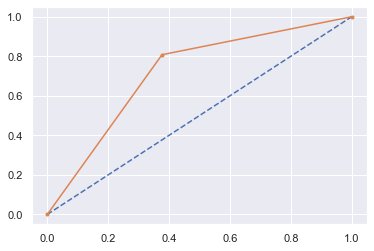

In [347]:
# predict probabilities
probs = DT_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [348]:
## Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [349]:
## Performance Matrix on train data set

y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8865979381443299
[[262  70]
 [ 51 684]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



In [350]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8318777292576419
[[ 96  34]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



**Cross Validation on Naive Bayes Model**

In [351]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(NB_SM_model, X_train_res, y_train_res, cv=10)
scores

array([0.80952381, 0.79591837, 0.83673469, 0.82312925, 0.82993197,
       0.84353741, 0.76870748, 0.79591837, 0.82312925, 0.82993197])

In [352]:
scores = cross_val_score(NB_SM_model, X_test, y_test, cv=10)
scores

array([0.82608696, 0.84782609, 0.82608696, 0.80434783, 0.76086957,
       0.80434783, 0.84782609, 0.91304348, 0.88888889, 0.82222222])

In [353]:
## After 10 fold cross validation, scores both on train and test data set respectively for all 10 folds are almost same. 
## Hence our model is valid.

**Model Tuning using hyper parameters**

In [354]:
## LOGISTIC REGRESSION
from sklearn.model_selection import GridSearchCV
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_logistic = GridSearchCV(lr, param_grid = grid_values,scoring = 'recall')
grid_logistic.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=2000, random_state=1),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [355]:
grid_logistic.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [356]:
grid_logistic.best_score_

1.0

In [357]:
best_model_logistic = grid_logistic.best_estimator_

In [358]:
y_train_predict = best_model_logistic.predict(X_test)
model_score = best_model_logistic.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7161572052401747
[[ 96  34]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



<AxesSubplot:>

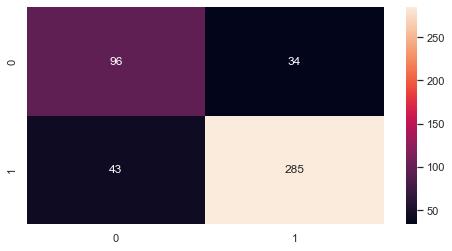

In [359]:
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True, fmt="2g")

AUC: 0.878


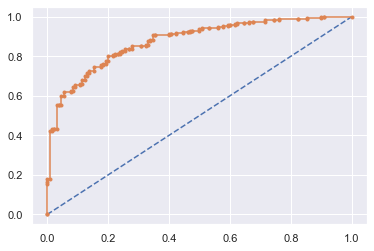

In [360]:
# AUC and ROC for the test data

# predict probabilities
probs = best_model_logistic.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [361]:
## Linear Discriminant Analysis
from sklearn.model_selection import GridSearchCV
grid_values={'solver': ['svd','lsqr', 'eigen']}
grid_LDA = GridSearchCV(LDA_model, param_grid = grid_values,scoring = 'recall')
grid_LDA.fit(X_train, y_train)

GridSearchCV(estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen']}, scoring='recall')

In [362]:
grid_LDA.best_params_

{'solver': 'svd'}

In [363]:
grid_LDA.best_score_

0.8952380952380953

In [364]:
best_model_LDA = grid_LDA.best_estimator_

In [365]:
y_train_predict = best_model_LDA.predict(X_test)
model_score = best_model_LDA.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8187772925764192
[[ 96  34]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



<AxesSubplot:>

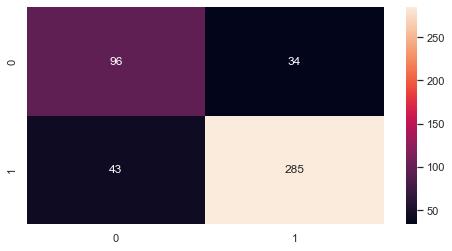

In [366]:
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True, fmt="2g")

AUC: 0.884


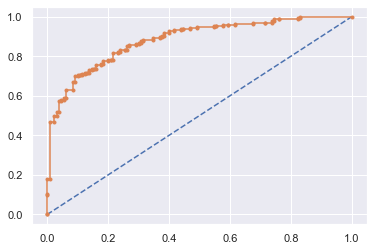

In [367]:
# AUC and ROC for the test data

# predict probabilities
probs = best_model_LDA.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [368]:
## KNN

from sklearn.model_selection import GridSearchCV
grid_values={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_KNN = GridSearchCV(knn, param_grid = grid_values,scoring = 'recall')
grid_KNN.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                       'brute']},
             scoring='recall')

In [369]:
grid_KNN.best_params_

{'algorithm': 'auto'}

In [370]:
grid_LDA.best_score_

0.8952380952380953

In [371]:
best_model_KNN = grid_KNN.best_estimator_

In [372]:
y_train_predict = best_model_KNN.predict(X_test)
model_score = best_model_KNN.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8231441048034934
[[ 96  34]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



<AxesSubplot:>

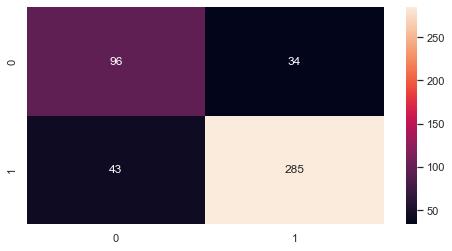

In [373]:
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True, fmt="2g")

AUC: 0.884


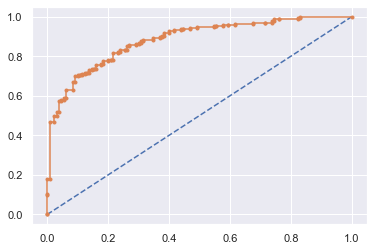

In [374]:
# AUC and ROC for the test data

# predict probabilities
probs = best_model_LDA.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [375]:
## ADA BOOST

from sklearn.model_selection import GridSearchCV
grid_values={'n_estimators' : [100,500,1000],
    'learning_rate' : [0.1,0.01,0.001],
    'algorithm' : ['SAMME', 'SAMME.R']}
grid_ADB = GridSearchCV(ADB_model, param_grid = grid_values,scoring = 'recall')
grid_ADB.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(n_estimators=100, random_state=1),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 500, 1000]},
             scoring='recall')

In [376]:
grid_ADB.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 500}

In [377]:
grid_ADB.best_score_

0.9591836734693876

In [378]:
best_model_ADB = grid_ADB.best_estimator_

In [379]:
y_train_predict = best_model_ADB.predict(X_test)
model_score = best_model_ADB.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8122270742358079
[[ 96  34]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



<AxesSubplot:>

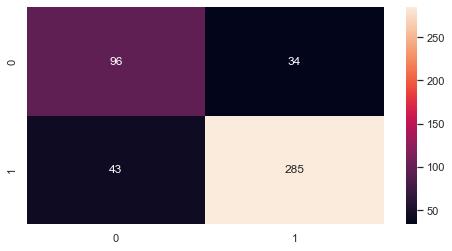

In [380]:
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True, fmt="2g")

AUC: 0.868


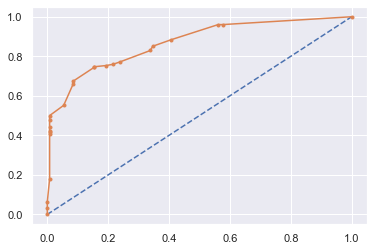

In [381]:
# AUC and ROC for the test data

# predict probabilities
probs = best_model_ADB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [382]:
## NAIVE BAYES

from sklearn.model_selection import GridSearchCV
grid_values={'weights':['uniform', 'distance'],
    'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[30,45,50],
    'p':[2,1]}
grid_NB = GridSearchCV(knn, param_grid = grid_values,scoring = 'recall')
grid_NB.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 45, 50], 'p': [2, 1],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [383]:
grid_NB.best_params_

{'algorithm': 'auto', 'leaf_size': 30, 'p': 1, 'weights': 'uniform'}

In [384]:
grid_NB.best_score_

0.8829931972789116

In [385]:
best_model_NB = grid_NB.best_estimator_

In [386]:
y_train_predict = best_model_NB.predict(X_test)
model_score = best_model_NB.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8165938864628821
[[ 96  34]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



<AxesSubplot:>

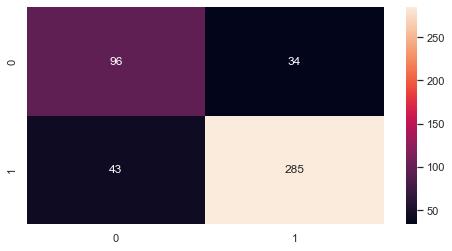

In [387]:
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True, fmt="2g")

AUC: 0.871


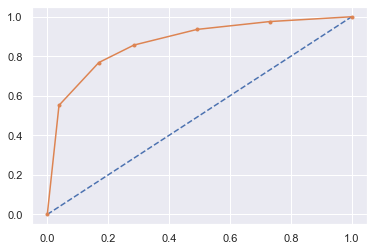

In [388]:
# AUC and ROC for the test data

# predict probabilities
probs = best_model_NB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [389]:
## DECISION TREE

from sklearn.model_selection import GridSearchCV
grid_values={'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]}
grid_DT = GridSearchCV(DT_model, param_grid = grid_values,scoring = 'recall')
grid_DT.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]},
             scoring='recall')

In [390]:
grid_DT.best_params_

{'max_depth': 5,
 'min_samples_leaf': 15,
 'min_samples_split': 100,
 'random_state': 0}

In [391]:
grid_DT.best_score_

0.8979591836734695

In [392]:
best_model_DT = grid_DT.best_estimator_

In [393]:
y_train_predict = best_model_DT.predict(X_test)
model_score = best_model_DT.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8056768558951966
[[ 96  34]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



<AxesSubplot:>

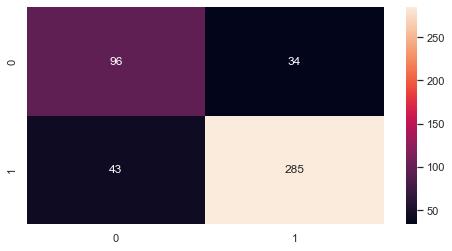

In [394]:
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True, fmt="2g")

AUC: 0.867


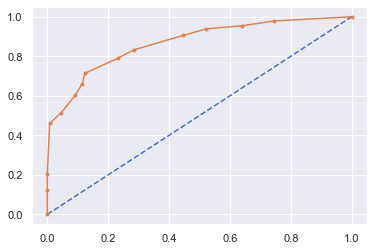

In [395]:
# AUC and ROC for the test data

# predict probabilities
probs = best_model_DT.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [396]:
## RANDOM FOREST

from sklearn.model_selection import GridSearchCV
grid_values={'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]}
grid_RF = GridSearchCV(RF_model, param_grid = grid_values,scoring = 'recall')
grid_RF.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=500, random_state=1),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]},
             scoring='recall')

In [397]:
grid_RF.best_params_

{'max_depth': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 30,
 'random_state': 0}

In [398]:
grid_RF.best_score_

0.9564625850340136

In [399]:
best_model_RF = grid_RF.best_estimator_

In [400]:
y_train_predict = best_model_RF.predict(X_test)
model_score = best_model_RF.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8231441048034934
[[ 96  34]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



<AxesSubplot:>

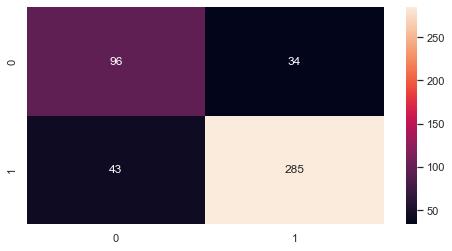

In [401]:
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True, fmt="2g")

AUC: 0.896


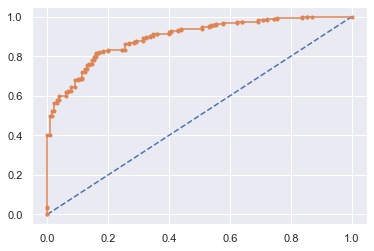

In [402]:
# AUC and ROC for the test data

# predict probabilities
probs = best_model_RF.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

In [403]:
## ALL THE RESPECTIVE MODELS ARE PERFORRMED ABOVE.

## 1.8 Based on these predictions, what are the insights?

1)Comparing all the performance measure. Naïve Bayes model is very consistent when train and test results are compared with each other. Along with other parameters such as Recall value, AUC_SCORE and AUC_ROC_Curve, those results were pretty good is this model.

2)Labour party is performing better than Conservative from huge margin.

3)Female voters turn out is greater than the male voters.

4)Those who have better national economic conditions are preferring to vote for Labour party. 

5)Persons having higher Eurosceptic sentiments conservative party are preferring to vote for Conservative party. 

6)Those who have higher political knowledge have voted for Conservative party 

7)Looking at the assessment for both the leaders, Labour Leader is performing well as he has got better ratings in assessment.

**CONCLUSION**

So we will select models which have performed approximately similar on the train and test data set and apply smote on the same to check if the performance has improved or not i.e. Naive Bayes and KNN etc

## **Problem 2:**

**In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:**

**President Franklin D. Roosevelt in 1941**
**President John F. Kennedy in 1961**
**President Richard Nixon in 1973**

**(Hint: use .words(), .raw(), .sent() for extracting counts)**

**2.1 Find the number of characters, words, and sentences for the mentioned documents.**

**2.2 Remove all the stopwords from all three speeches.**

**2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)**

**2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)**

In [404]:
import nltk
import pandas as pd
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\BARKHA\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [405]:
index = ['1941-Roosevelt','1961-Kennedy','1973-Nixon']
inaugural_speech=pd.DataFrame({'president':['Roosevelt - 1941','Kennedy - 1961','Nixon - 1973'],
                               'text':[inaugural.raw('1941-Roosevelt.txt'),
                                       inaugural.raw('1961-Kennedy.txt'),
                                       inaugural.raw('1973-Nixon.txt')]},index=index)

In [406]:
inaugural_speech

,president,text
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


## 2.1 Find the number of characters, words, and sentences for the mentioned documents. 

In [407]:
## number of words

inaugural_speech['word_count'] = inaugural_speech['text'].apply(lambda x: len(str(x).split(" ")))
inaugural_speech

,president,text,word_count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,1323
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769


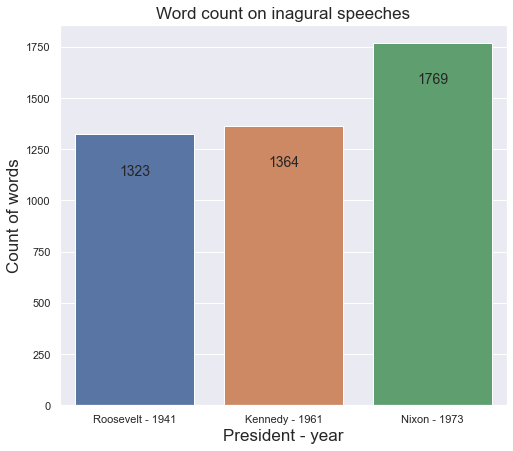

In [408]:
plt.figure(figsize=(8,7))
ax = sns.barplot(y='word_count', x='president', data=inaugural_speech)
plt.title('Word count on inagural speeches',fontsize=17)
plt.xlabel('President - year',fontsize=17)
plt.ylabel('Count of words',fontsize=17)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()-200), fontsize = 14)

In [409]:
## number of characters

inaugural_speech['char_count'] = inaugural_speech['text'].str.len()
inaugural_speech

,president,text,word_count,char_count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,1323,7571
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364,7618
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769,9991


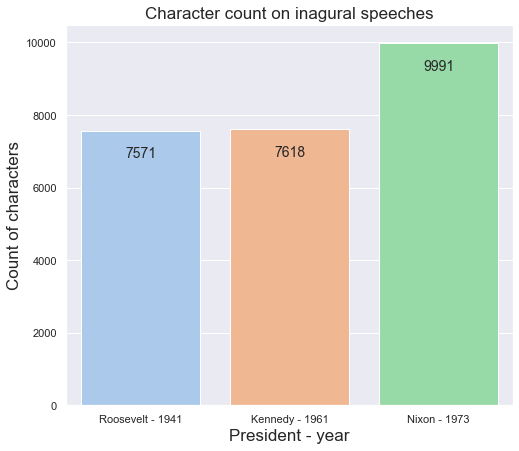

In [410]:
plt.figure(figsize=(8,7))
ax = sns.barplot(y='char_count', x='president', data=inaugural_speech, palette = 'pastel')
plt.title('Character count on inagural speeches',fontsize=17)
plt.xlabel('President - year',fontsize=17)
plt.ylabel('Count of characters',fontsize=17)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()-750), fontsize = 14)

In [411]:
## number of sentenses

from nltk.tokenize import sent_tokenize
inaugural_speech['sents_count'] = inaugural_speech['text'].apply(lambda x: len(sent_tokenize(x)))
inaugural_speech

,president,text,word_count,char_count,sents_count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,1323,7571,68
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364,7618,52
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769,9991,68


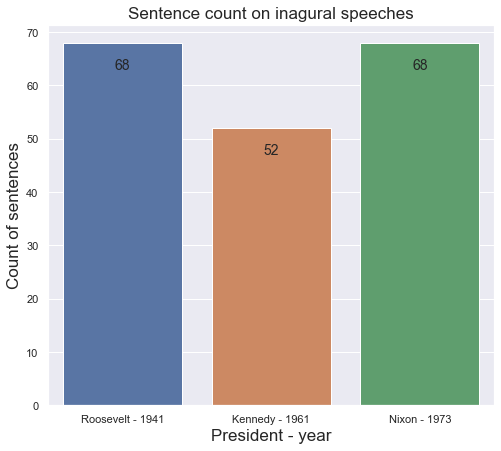

In [412]:
plt.figure(figsize=(8,7))
ax = sns.barplot(y='sents_count', x='president', data=inaugural_speech)
plt.title('Sentence count on inagural speeches',fontsize=17)
plt.xlabel('President - year',fontsize=17)
plt.ylabel('Count of sentences',fontsize=17)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.35,
                     p.get_height()-5), fontsize = 14)

## 2.2 Remove all the stopwords from all three speeches

In [413]:
# Lower case conversion
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
inaugural_speech['text']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson, mr. speaker, mr. chief...
1973-Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: text, dtype: object

In [414]:
# Remove punctuation
inaugural_speech['text'] = inaugural_speech['text'].str.replace('[^\w\s]','')
inaugural_speech['text']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson mr speaker mr chief jus...
1973-Nixon        mr vice president mr speaker mr chief justice ...
Name: text, dtype: object

In [415]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
add_to_stop_words = ['mr','on','it','the','in','let','to','us','shall']
stop_words.extend(add_to_stop_words)
stop_words=set(stop_words)

In [416]:
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
inaugural_speech

,president,text,word_count,char_count,sents_count
1941-Roosevelt,Roosevelt - 1941,national day inauguration since 1789 people re...,1323,7571,68
1961-Kennedy,Kennedy - 1961,vice president johnson speaker chief justice p...,1364,7618,52
1973-Nixon,Nixon - 1973,vice president speaker chief justice senator c...,1769,9991,68


In [417]:
print("Speech of president Roosevelt without stopwords")
list(inaugural_speech[inaugural_speech['president']=="Roosevelt - 1941"].text)

Speech of president Roosevelt without stopwords


['national day inauguration since 1789 people renewed sense dedication united states washingtons day task people create weld together nation lincolns day task people preserve nation disruption within day task people save nation institutions disruption without come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought greater security hope better understanding lifes ideals measured material things vi

In [418]:
print("Speech of president Kennedy without stopwords")
list(inaugural_speech[inaugural_speech['president']=="Kennedy - 1961"].text)

Speech of president Kennedy without stopwords


['vice president johnson speaker chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world every nation know whether wishes well ill pay price bear burden meet hardship support friend oppose foe order assure survival success liberty much p

In [419]:
print("Speech of president Nixon without stopwords")
list(inaugural_speech[inaugural_speech['president']=="Nixon - 1973"].text)

Speech of president Nixon without stopwords


['vice president speaker chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question use peace resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw farreaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world americas bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations americas role maintaining peac

## 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [420]:
freq = pd.Series(' '.join(inaugural_speech.iloc[0:1,1]).split()).value_counts()[:5]
freq

nation       11
know         10
spirit        9
democracy     9
life          8
dtype: int64

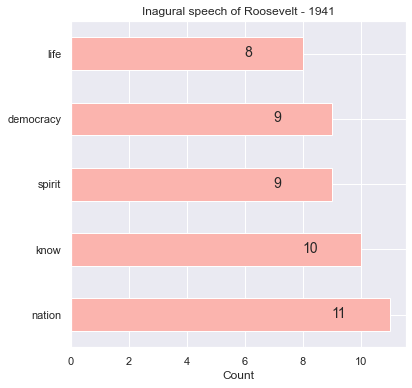

In [421]:
plt.figure(figsize=(6,6))
ax = freq.plot(kind='barh', colormap = 'Pastel1')
plt.title('Inagural speech of Roosevelt - 1941')
plt.xlabel('Count')
#plt.ylabel('Top words')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=14)

In [422]:
freq = pd.Series(' '.join(inaugural_speech.iloc[1:2,1]).split()).value_counts()[:5]
freq

world     8
sides     8
new       7
pledge    7
power     5
dtype: int64

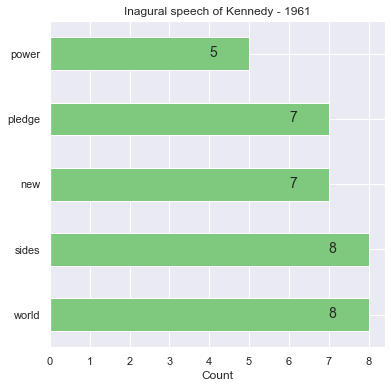

In [423]:
plt.figure(figsize=(6,6))
ax = freq.plot(kind='barh', colormap = 'Accent')
plt.title('Inagural speech of Kennedy - 1961')
plt.xlabel('Count')
#plt.ylabel('Count')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-1, p.get_y()+.20), fontsize=14)

In [424]:
freq = pd.Series(' '.join(inaugural_speech.iloc[2:3,1]).split()).value_counts()[:5]
freq

peace             19
world             16
new               15
america           13
responsibility    11
dtype: int64

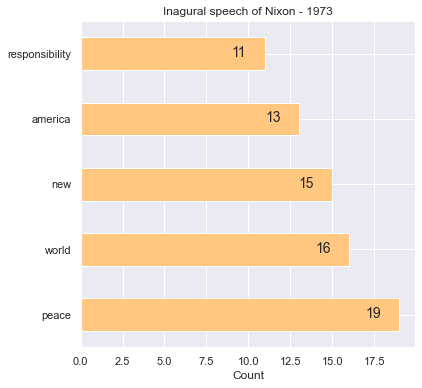

In [425]:
plt.figure(figsize=(6,6))
ax = freq.plot(kind='barh', colormap = 'copper_r')
plt.title('Inagural speech of Nixon - 1973')
plt.xlabel('Count')
#plt.ylabel('Count')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=14)

## 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)

Word Cloud for Roosewelt after cleaning


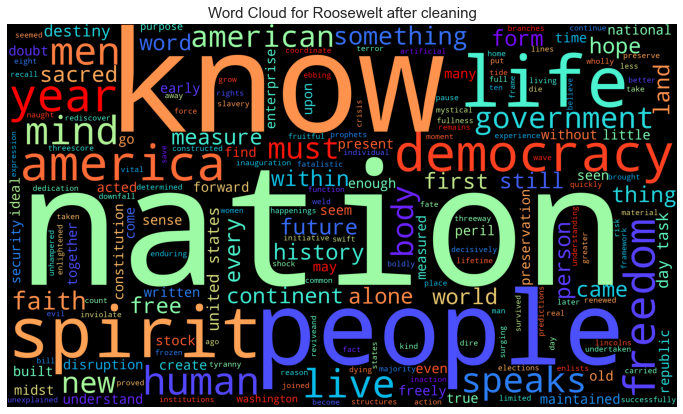

In [426]:
from wordcloud import WordCloud,STOPWORDS
#new_df=inaugural_speech.iloc[0:1,0]
words = ' '.join(inaugural_speech.iloc[0:1,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'rainbow',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud for Roosewelt after cleaning",fontsize=15)
print("Word Cloud for Roosewelt after cleaning")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Word Cloud for Kennedy after cleaning


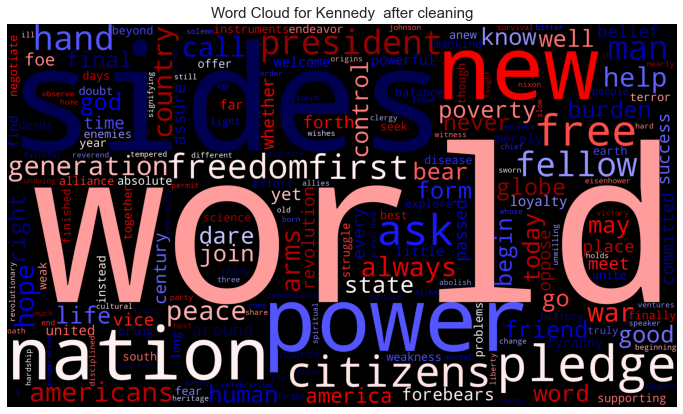

In [427]:
words = ' '.join(inaugural_speech.iloc[1:2,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'seismic_r',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud for Kennedy  after cleaning",fontsize=15)
print("Word Cloud for Kennedy after cleaning")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Word Cloud for Nixon after cleaning


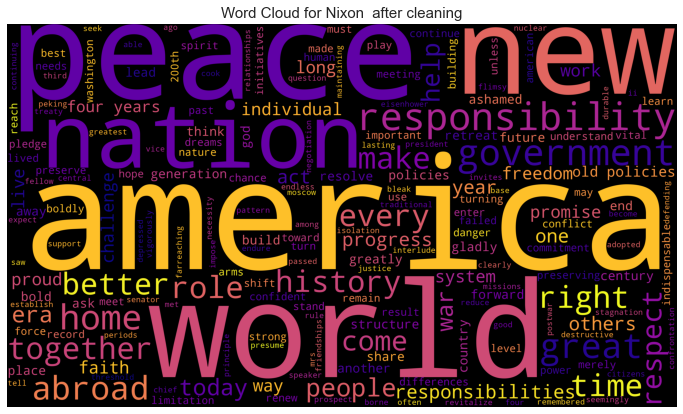

In [428]:
words = ' '.join(inaugural_speech.iloc[2:3,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'plasma',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud for Nixon  after cleaning",fontsize=15)
print("Word Cloud for Nixon after cleaning")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()